In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
print("import done")

Using TensorFlow backend.


import done


In [2]:
#https://github.com/debadridtt/A-Review-of-Different-Word-Embeddings-for-Sentiment-Classification-using-Deep-Learning/blob/master/LSTM%20Experiment.ipynb

### Loading the data

In [3]:
import os
DATA_FILE = os.path.abspath('../DATA/DATA_not_ameliorate.csv')
df = pd.read_csv(DATA_FILE,delimiter=';',encoding='UTF-8')
print(df.head())

                                                text     label
0  I had ordered a data cable, got a very well fi...  NOTISSUE
1                                   Love This Phone.  NOTISSUE
2                I get a very well finished product.  NOTISSUE
3                             I couldn't be happier.  NOTISSUE
4  I was looking for this headset for a long time...  NOTISSUE


In [4]:
df['label'].value_counts() #balanced Dataset


NOTISSUE    2028
ISSUE       2027
Name: label, dtype: int64

In [5]:
df.shape

(4055, 2)

### Exploratory Data Analysis

C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


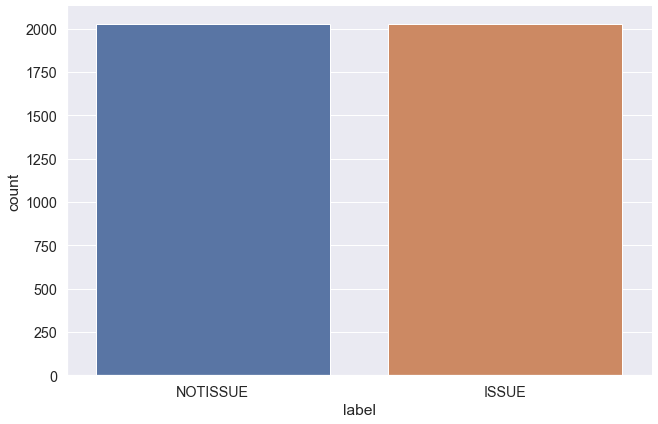

In [6]:
#Target variable
sns.factorplot(x="label", data=df, kind="count", size=6, aspect=1.5)
plt.show();

###  Preprocessing the Data


In [7]:
# List stop words
STOP_WORDS ={
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 #'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 #'became',
 'because',
 #'become',
 #'becomes',
 #'becoming',
 #'been',
 'before',
 'beforehand',
 #'behind',
 #'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 #'call',
 'can',
 'cannot',
 'could',
 'did',
 #'do',
 #'does',
 #'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 #'everything',
 'everywhere',
 'except',
 'few',
 'first',
 'for',
 'former',
 'formerly',
 'from',
 'front',
 'full',
 'further',
 #'had',
 #'has',
 #'have',
 'he',
 'hence',
 'her',
 'here',
 'hereafter',
 'hereby',
 'herein',
 'hereupon',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'hundred',
 'i',
 'if',
 'in',
 'indeed',
 'into',
 #'is',
 'it',
 'its',
 'itself',
 'just',
 'last',
 'latter',
 'latterly',
 'least',
 'less',
 #'made',
 #'make',
 'many',
 'may',
 'me',
 'meanwhile',
 'might',
 'mine',
 'more',
 'moreover',
 'most',
 'mostly',
 'move',
 'much',
 'must',
 'my',
 'myself',
 'name',
 'namely',
 'neither',
 'nevertheless',
 'next',
 'noone',
 'nor',
 'now',
 'nowhere',
 'of',
 'off',
 'often',
 'on',
 'once',
 'only',
 'onto',
 'or',
 'other',
 'others',
 'otherwise',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'part',
 'per',
 'perhaps',
 'put',
 'quite',
 'rather',
 're',
 'really',
 'regarding',
 'same',
 #'say',
 #'see',
 #'seem',
 #'seemed',
 #'seeming',
 #'seems',
 'serious',
 'several',
 'she',
 'should',
 #'show',
 'side',
 'since',
 'so',
 'some',
 'somehow',
 'someone',
 'something',
 'sometime',
 'sometimes',
 'somewhere',
 'still',
 'such',
 #'take',
 'than',
 'that',
 'the',
 'their',
 'them',
 'themselves',
 'then',
 'thence',
 'there',
 'thereafter',
 'thereby',
 'therefore',
 'therein',
 'thereupon',
 'these',
 'they',
 'third',
 'this',
 'those',
 'though',
 'three',
 'through',
 'throughout',
 'thru',
 'thus',
 'to',
 'together',
 'too',
 'top',
 #'toward',
 #'towards',
 'twelve',
 'under',
 'unless',
 'until',
 'up',
 'upon',
 'us',
 #'used',
 'using',
 'various',
 'very',
 'via',
 'was',
 'we',
 'were',
 'what',
 'whatever',
 'when',
 'whence',
 'whenever',
 'where',
 'whereafter',
 'whereas',
 'whereby',
 'wherein',
 'whereupon',
 'wherever',
 'whether',
 'which',
 'while',
 'whither',
 'who',
 'whoever',
 'whole',
 'whom',
 'whose',
 'why',
 'will',
 'with',
 'within',
 'without',
 'would',
 'yet',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [8]:
switcher = {
"couldn't": "could not",
        "couldn": "could not",
        "won't": "will not",
        "won": "will not",
        "mustn't": "must not",
        "mustn": "must not",
        "that'll": "that will",
        "shouldn't": "should not",
        "shouldn": "should not",
        "should've": "should have",
        "haven't": "have not",
        "haven": "have not",
        "hadn't": "have not",
        "hadn": "have not",
        "hasn't": "have not",
        "hasn": "have not",
        "didn't": "do not",
        "didn": "do not",
        "doesn't": "do not",
        "doesn": "do not",
        "don't": "do not",
        "don": "do not", 
        "isn't": "be not",
        "you'd":"you would",
        "you've":"you have",
        "you're":"you are",
        "you'll":"you will",
        "she's":"she is",
        "she'd":"she would",
        "she'll":"she will",
        "he's":"he is",
        "he'd":"he would",
        "he'll":"he will",
        "it's":"it is",
        "it'd":"it would",
        "it'll":"it will",
        "aren't":"are not",
        "aren":"are not",
        "weren't":"were not",
        "weren":"were not",
        "wouldn't":"would not",
        "wouldn":"would not",
        "needn't":"need not",
        "needn":"need not",
        "wasn't":"was not",
        "wasn":"was not",
        "mightn't":"might not",
        "mightn":"might not",
        "shan't":"shall not",
        "shan":"shall not", 
        "can't":"can not",
        "i'm":"i am",
        "i'd":"i would",
        "i'll":"i will",
        "i've":"i have",
        "we're":"we are",
        "we'd":"we would",
        "we'll":"we will",
        "we've":"we have",
        "they're":"they are",
        "they'd":"they would",
        "they'll":"they will",
        "they've":"they have",
        "let's":"let us",
        "how's":"how is",
        "here's":"here is",
        "what's":"what is",
        "there's":"there is",
        'awsm': 'awesome',
        "aamof": "as a matter of fact",
        "abt": "about",
        "abt2": "about to",
        "ac": "air conditioning",
        "ace": "solo winner",
        "ack": "acknowledged",
        "admin": "administrator",
        "thr": "there",
        "frm": "from",
        "aggro": "aggression",
        "agl": "angel",
        "dob": "date of birth",
        "ai": "artificial intelligence",
        "aiic": "as if i care",
        "aka": "also known as",
        "alap": "as long as possible",
        "alol": "actually laughing out loud",
        "ama": "ask me anything",
        "amap": "as much as possible",
        "amazn": "amazing",
        "ammo": "ammunition",
        "ams": "ask me something",
        "anon": "anonymous",
        "asap": "as soon as possible",
        "asat": "as simple as that",
        "awks": "awkward",
        "awl": "always with love",
        "ayk": "as you know",
        "azm": "awesome",
        "b": "be",
        "b&w": "black and white",
        "b-day": "birthday",
        "bday": "birthday",
        "bcoz": "because",
        "bcos": "because",
        "bcz": "because",
        "bf": "boyfriend",
        "btw": "between",
        "b4": "before",
        "bai": "bye",
        "bb": "bye bye",
        "bc": "abuse",
        "mc": "abuse",
        "bcc": "blind carbon copy",
        "bff": "best friends forever",
        "biz": "business",
        "bk": "back",
        "bo": "back off",
        "bro": "brother",
        "btwn": "between",
        "c": "see",
        "char": "character",
        "combo": "combination",
        "cu": "see you",
        "cu2": "see you too",
        "cu2mr": "see you tomorrow",
        "cya": "see ya",
        "cyal8r": "see you later",
        "cyb": "call you back",
        "cye": "check your e-mail",
        "cyf": "check your facebook",
        "cyfb": "check your facebook",
        "cyl": "catch ya later",
        "cym": "check your myspace",
        "cyo": "see you online",
        "d8": "date",
        "da": "the",
        "dece": "decent",
        "ded": "dead",
        "dept": "department",
        "dis": "this",
        "ditto": "same",
        "diva": "rude woman",
        "dk": "don't know",
        "dlm": "don't leave me",
        "dm": "direct message",
        "dnd": "do not disturb",
        "dno": "don't know",
        "dnt": "don't",
        "e1": "everyone",
        "eg": "for example",
        "emc2": "genius",
        "emo": "emotional",
        "enuf": "enough",
        "eod": "end of discussion",
        "eof": "end of file",
        "eom": "end of message",
        "eta": "estimated time of arrival",
        "every1": "everyone",
        "evs": "whatever",
        "exp": "experience",
        "f": "female",
        "f2f": "face to face",
        "f2p": "free to play",
        "f2t": "free to talk",
        "f9": "fine",
        "fab": "fabulous",
        "fail": "failure",
        "faq": "frequently asked questions",
        "fav": "favorite",
        "fave": "favorite",
        "favs": "favorites",
        "fb": "facebook",
        "fbc": "facebook chat",
        "fbf": "facebook friend",
        "fml": "family",
        "fn": "fine",
        "fo": "freaking out",
        "fri": "friday",
        "frnd": "friend",
        "fu": "fuck you",
        "fugly": "fucking ugly",
        "gf": "girlfriend",
        "g1": "good one",
        "g2b": "going to bed",
        "g2cu": "good to see you",
        "g2g": "good to go",
        "g4i": "go for it",
        "g4n": "good for nothing",
        "g4u": "good for you",
        "g9": "goodnight",
        "ga": "go ahead",
        "ge": "good evening",
        "gl": "good luck",
        "gm": "good morning",
        "gn": "goodnight",
        "gonna": "going to",
        "goon": "idiot",
        "gorge": "gorgeous",
        "gr8": "great",
        "grats": "congratulations",
        "gratz": "congratulations",
        "grl": "girl",
        "gt2t": "got time to talk",
        "gtg": "good to go",
        "gud": "good",
        "gv": "give",
        "gvn": "given",
        "gw": "good work",
        "h/o": "hold on",
        "h/p": "hold please",
        "h/t": "hat tip",
        "h/u": "hook up",
        "h2cus": "hope to see you soon",
        "h4u": "hot for you",
        "h4x0r": "hacker",
        "h4x0rz": "hackers",
        "h8": "hate",
        "h8r": "hater",
        "h8t": "hate",
        "ha": "hello again",
        "haha": "laughing",
        "hai": "hi",
        "hak": "hugs and kisses",
        "han": "how about now?",
        "hav": "have",
        "hax": "hacks",
        "haxor": "hacker",
        "hay": "how are you",
        "hb2u": "happy birthday to you",
        "hbbd": "happy belated birthday",
        "hbd": "happy birthday",
        "hc": "how cool",
        "hcit": "how cool is that",
        "hehe": "laughing",
        "hf": "have fun",
        "hi5": "high five",
        "hig": "how's it going?",
        "hih": "hope it helps",
        "ho": "hold on",
        "hoc": "house of cards",
        "hof": "hall of fame",
        "holla": "holler",
        "hom": "hit or miss",
        "hood": "neighborhood",
        "hoops": "basketball",
        "hottie": "attractive person",
        "hr": "human resources",
        "hru": "how are you",
        "hry": "hurry",
        "hubby": "husband",
        "hwk": "homework",
        "hwp": "height weight proportionate",
        "hwu": "hey, what's up?",
        "hxc": "hardcore",
        "h^": "hook up",
        "i8": "i ate",
        "i8u": "i hate you",
        "ia": "i agree",
        "iab": "in a bit",
        "iac": "in any case",
        "iad": "it all depends",
        "iae": "in any event",
        "iag": "it's all good",
        "iagw": "in a good way",
        "iail": "i am in love",
        "iam": "in a minute",
        "ic": "i see",
        "id10t": "idiot",
        "idc": "i don't care",
        "idd": "indeed",
        "idi": "i doubt it",
        "idk": "i don't know",
        "idky": "i don't know why",
        "idmb": "i'll do my best",
        "idn": "i don't know",
        "idnk": "i do not know",
        "idr": "i don't remember",
        "idt": "i don't think",
        "idts": "i don't think so",
        "idtt": "i'll drink to that",
        "idu": "i don't understand",
        "ie": "that is",
        "ig2p": "i got to pee",
        "iggy": "ignored",
        "ight": "alright",
        "igi": "i get it",
        "ign": "in-game name",
        "igtp": "i get the point",
        "ih8u": "i hate you",
        "ihu": "i hate you",
        "ihy": "i hate you",
        "ii": "i'm impressed",
        "iiok": "if i only knew",
        "iir": "if i remember",
        "iirc": "if i remember correctly",
        "iit": "i'm impressed too",
        "iiuc": "if i understand correctly",
        "ik": "i know",
        "ikhyf": "i know how you feel",
        "ikr": "i know, right?",
        "ikwum": "i know what you mean",
        "ikwym": "i know what you mean",
        "ikyd": "i know you did",
        "ilu": "i like you",
        "ilu2": "i love you too",
        "ilub": "i love you baby",
        "ilyk": "i'll let you know",
        "ilyl": "i love you lots",
        "ilysm": "i love you so much",
        "ima": "i'm",
        "imma": "i'm gonna",
        "imo": "in my opinion",
        "imy": "i miss you",
        "inb4": "in before",
        "inc": "incoming",
        "indie": "independent",
        "info": "information",
        "init": "initialize",
        "ipo": "initial public offering",
        "ir": "in room",
        "ir8": "irate",
        "irdk": "i really don't know",
        "irl": "in real life",
        "iyo": "in your opinion",
        "iyq": "i like you",
        "j/k": "just kidding",
        "j/p": "just playing",
        "j/w": "just wondering",
        "j2lyk": "just to let you know",
        "j4f": "just for fun",
        "j4g": "just for grins",
        "jas": "just a second",
        "jb/c": "just because",
        "joshing": "joking",
        "k": "ok",
        "k3u": "i love you",
        "kappa": "sarcasm",
        "kek": "korean laugh",
        "keke": "korean laugh",
        "kewl": "cool",
        "kewt": "cute",
        "kfc": "kentucky fried chicken",
        "kgo": "ok, go",
        "kik": "laughing out loud",
        "kinda": "kind of",
        "kk": "ok",
        "kl": "kool",
        "km": "kiss me",
        "kma": "kiss my ass",
        "knp": "ok, no problem",
        "kw": "know",
        "kwl": "cool",
        "l2m": "listening to music",
        "l2p": "learn to play",
        "l33t": "leet",
        "l8": "late",
        "l8er": "later",
        "l8r": "later",
        "la": "laughing a lot",
        "laf": "laugh",
        "laffing": "laughing",
        "lafs": "love at first sight",
        "lam": "leave a message",
        "lamer": "lame person",
        "legit": "legitimate",
        "lemeno": "let me know",
        "lil": "little",
        "lk": "like",
        "llol": "literally laughing out loud",
        "lmho": "laughing my head off",
        "loi": "laughing on the inside",
        "lola": "love often, laugh a lot",
        "lolol": "lots of laugh out louds",
        "lolz": "laugh out louds",
        "ltr": "later",
        "lulz": "lol",
        "luv": "love",
        "luzr": "loser",
        "lv": "love",
        "ly": "love ya",
        "lya": "love you always",
        "lyk": "let you know",
        "lyn": "lying",
        "lysm": "love you so much",
        "m": "male",
        "mcd": "mcdonald's",
        "mcds": "mcdonald's",
        "md@u": "mad at you",
        "me2": "me too",
        "meh": "whatever",
        "mf": "mother fucker",
        "mfb": "mother fucking bitch",
        "mgmt": "management",
        "mid": "middle",
        "mil": "mother-in-law",
        "min": "minute",
        "mins": "minutes",
        "mk": "okay",
        "mkay": "ok",
        "mmk": "ok",
        "mms": "multimedia messaging service",
        "mng": "manage",
        "mngr": "manager",
        "mod": "modification",
        "mofo": "mother fucking",
        "mojo": "attractive talent",
        "moss": "chill",
        "ms": "miss",
        "msg": "message",
        "mtg": "meeting",
        "mth": "month",
        "mu": "miss you",
        "mu@": "meet you at",
        "muah": "kiss",
        "mula": "money",
        "mwa": "kiss",
        "mwah": "kiss",
        "n/m": "nevermind",
        "n/m/h": "nothing much here",
        "n/r": "no reserve",
        "n00b": "newbie",
        "n1": "nice one",
        "n1c": "no one cares",
        "n2m": "not too much",
        "n2mh": "not too much here",
        "n2w": "not to worry",
        "n64": "nintendo 64",
        "n8kd": "naked",
        "nac": "not a chance",
        "nah": "no",
        "nal": "nationality",
        "narc": "tattle tale",
        "nark": "informant",
        "naw": "no",
        "nb": "not bad",
        "nbd": "no big deal",
        "nbjf": "no brag, just fact",
        "nd": "and",
        "ne": "any",
        "ne1": "anyone",
        "ne1er": "anyone here",
        "neh": "no",
        "nemore": "anymore",
        "neva": "never",
        "neway": "anyway",
        "newaze": "anyways",
        "newb": "newbie",
        "nite": "night",
        "nn2r": "no need to reply",
        "nnito": "not necessarily in that order",
        "nnto": "no need to open",
        "nntr": "no need to reply",
        "no1": "no one",
        "noob": "newbie",
        "nooblet": "young newbie",
        "nooblord": "ultimate newbie",
        "notch": "minecraft creator",
        "nottie": "unattractive person",
        "np": "no problem",
        "nub": "newbie",
        "nuff": "enough",
        "nufn": "nothing",
        "num": "tasty",
        "nvm": "nevermind",
        "nvr": "never",
        "nvrm": "nevermind",
        "nw": "no way",
        "nxt": "next",
        "o4u": "only for you",
        "obtw": "oh, by the way",
        "obv": "obviously",
        "obvi": "obviously",
        "oc": "of course",
        "ohemgee": "oh my gosh",
        "oic": "oh, i see",
        "oicn": "oh, i see now",
        "oiy": "hi",
        "omg": "oh my god",
        "onl": "online",
        "onoz": "oh no",
        "orly": "oh really",
        "otay": "okay",
        "otw": "on the way",
        "outta": "out of",
        "ovie": "overlord",
        "ownage": "completely owned",
        "p/d": "per day",
        "p/m": "per month",
        "p/y": "per year",
        "p911": "parent alert!",
        "p@h": "parents at home",
        "pc": "personal computer",
        "pda": "public display of affection",
        "pic": "picture",
        "pj": "poor joke",
        "pl8": "plate",
        "pld": "played",
        "pls": "please",
        "plz": "please",
        "plzrd": "please read",
        "pov": "point of view",
        "ppl": "people",
        "ppp": "peace",
        "prof": "professor",
        "prolly": "probably",
        "promo": "promotion",
        "props": "recognition",
        "prot": "protection",
        "prvt": "private",
        "ps": "postscript",
        "ps2": "playstation 2",
        "ps3": "playstation 3",
        "psa": "public service announcement",
        "psog": "pure stroke of genius",
        "psp": "playstation portable",
        "ptm": "please tell me",
        "pwd": "password",
        "psd": "password",
        "pswd": "password",
        "pwnd": "owned",
        "pwned": "owned",
        "pwnt": "owned",
        "q4u": "question for you",
        "qfe": "quoted for emphasis",
        "qft": "quoted for truth",
        "qq": "quick question",
        "qqn": "looking",
        "qrg": "quick reference guide",
        "qt": "cutie",
        "qtpi": "cutie pie",
        "r": "are",
        "r8": "rate",
        "rdy": "ready",
        "re": "replay",
        "rehi": "hi again",
        "rents": "parents",
        "rep": "reputation",
        "resq": "rescue",
        "rgd": "regard",
        "rgds": "regards",
        "ridic": "ridiculous",
        "rip": "rest in peace",
        "rl": "real life",
        "rlrt": "real life retweet",
        "rly": "really",
        "rm": "room",
        "rn": "run",
        "rnt": "aren't",
        "rof": "laughing",
        "rofl": "laughing",
        "roflmao": "laughing",
        "roflol": "laughing out loud",
        "rolf": "laughing",
        "ru": "are you",
        "ruc": "are you coming?",
        "rut": "are you there?",
        "rx": "prescription",
        "s/o": "sold out",
        "s/u": "shut up",
        "s/w": "software",
        "s2r": "send to receive",
        "s2s": "sorry to say",
        "s2u": "same to you",
        "samzd": "still amazed",
        "sd": "sweet dreams",
        "sec": "second",
        "sho": "sure",
        "sh^": "shut up",
        "siul8r": "see you later",
        "siv": "bad goaltender",
        "sk8": "skate",
        "sk8r": "skater",
        "sly": "still love you",
        "smf": "so much fun",
        "smooch": "kiss",
        "sorta": "sort of",
        "spec": "specialization",
        "spk": "speak",
        "spkr": "speaker",
        "srry": "sorry",
        "srs": "serious",
        "srsly": "seriously",
        "sry": "sorry",
        "stpd": "stupid",
        "str": "strength",
        "str8": "straight",
        "sup": "what's up",
        "syl": "see you later",
        "sync": "synchronize",
        "t2go": "time to go",
        "t2m": "talk to me",
        "t2u": "talk to you",
        "t2ul": "talk to you later",
        "t2ul8er": "talk to you later",
        "t2ul8r": "talk to you later",
        "t4lmk": "thanks for letting me know",
        "t4p": "thanks for posting",
        "t4t": "thanks for trade",
        "tc": "take care",
        "teh": "the",
        "teme": "tell me",
        "tg": "thank goodness",
        "thnq": "thank you",
        "tho": "though",
        "thru": "through",
        "tht": "that",
        "thx": "thanks",
        "tl": "tell",
        "tlk": "talk",
        "tlkin": "talking",
        "tlking": "talking",
        "tomoz": "tomorrow",
        "tq": "thank you",
        "tqvm": "thank you very much",
        "tru": "true",
        "ttl": "talk to you later",
        "ttly": "totally",
        "ttul": "talk to you later",
        "tty": "talk to you",
        "tu": "thank you",
        "tude": "attitude",
        "tx": "thanks",
        "txt": "text",
        "txtin": "texting",
        "ty": "thank you",
        "tyfa": "thank you for asking",
        "tyl": "thank you lord",
        "tym": "thank you much",
        "tyt": "take your time",
        "tyvm": "thank you very much",
        "u": "you",
        "u-ok": "you ok?",
        "u/l": "upload",
        "u2": "you too",
        "u2u": "up to you",
        "uok": "you ok?",
        "ur": "your",
        "ut": "you there?",
        "veggies": "vegetables",
        "vry": "very",
        "vs": "versus",
        "w/": "with",
        "w/b": "welcome back",
        "w/e": "whatever",
        "w/o": "without",
        "w2f": "way too funny",
        "w2g": "way to go",
        "w2k": "windows 2000",
        "w4u": "wait for you",
        "w8": "wait",
        "w84m": "wait for me",
        "w8am": "wait a minute",
        "w8ing": "waiting",
        "w8n": "waiting",
        "wa": "what",
        "waa": "crying",
        "wack": "strange",
        "wan2": "want to",
        "wannabe": "want to be",
        "wat": "what",
        "watev": "whatever",
        "watevs": "whatever",
        "wlcm": "welcome",
        "wha": "what",
        "whipped": "tired",
        "wht": "what",
        "wk": "week",
        "wknd": "weekend",
        "wtf": "what the fuck",
        "wtg": "way to go",
        "wup": "what's up?",
        "ya": "yes",
        "yeap": "yes",
        "yep": "yes",
        "yepperz": "yes",
        "yesh": "yes",
        "yo": "hi",
        "yr": "your",
        "yrs": "years",
        "yt": "you there?",
        "yt?": "you there?",
        "yup": "yes",
        "yupz": "ok",
        "zzz": "sleeping",
        "ain't": "is not", "aren't": "are not","can't": "cannot", 
        "can't've": "cannot have", "'cause": "because", "could've": "could have", 
        "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
        "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
        "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
        "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
        "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
        "I'll've": "I will have","I'm": "I am", "I've": "I have", 
        "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", 
        "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
        "it'll": "it will", "it'll've": "it will have","it's": "it is", 
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
        "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
        "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
        "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                    "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have"
}


In [9]:
import nltk
import inflect
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import parsing
from gensim.parsing.preprocessing import split_alphanum
from spellchecker import SpellChecker
import re

C:\Users\khmar\ana\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [50]:
"""def replace_word(word):
    # Convert text to lower
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    #stops = set(stopwords.words("english"))

    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    
    # Removing all the tokens with lesser than 3 characters
    #text = gensim.corpora.textcorpus.remove_short(text, minsize=3)
    
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    
    
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        
        ##### Lemmatization
        # Reduce words to their root form
        # Lemmatize verbs by specifying pos
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    return text"""

'def replace_word(word):\n    # Convert text to lower\n    word = word.lower()\n    word = word.split()\n    for i in range(len(word)):\n        word[i] = switcher.get(word[i], word[i])\n    word = " ".join(word)\n    return word\n\ndef transformText(text):\n    text = split_alphanum(text)\n    # Convert text to lower\n    text = text.lower()\n    text = replace_word(text)\n    #stops = set(stopwords.words("english"))\n\n    # Removing non ASCII chars    \n    text = re.sub(r\'[^\x00-\x7f]\',r\' \',text)\n    \n    # Removing all the tokens with lesser than 3 characters\n    #text = gensim.corpora.textcorpus.remove_short(text, minsize=3)\n    \n    # Strip all the numerics\n    #text = gensim.parsing.preprocessing.strip_numeric(text)\n    \n    # Removing all the stopwords\n    filtered_words = [word for word in text.split() if word not in STOP_WORDS]\n    \n    # Preprocessed text after stop words removal\n    text = " ".join(filtered_words)\n    \n    # Remove the punctuation\n    te

In [10]:
def replace_word(word):
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

def remove_alphanumerics(text):
    """
    Remove alphanumeric words from text
    Example: hello man whatsup123 => hello man
    Args:
        text (str): text
    Returns:
        text (str): text with removed alphanumeric words
    """
    txt = []
    for each in text.split():
        if not any(x in each.lower() for x in "0123456789"):
            txt.append(each)
    txtsent = " ".join(txt)
    return txtsent

##Fixing Word Lengthening
##https://rustyonrampa"ge.github.io/text-mining/2017/11/28/spelling-correction-with-python-and-nltk.html
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

def replace_numbers(word):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    word = word.split()
    for i in range(len(word)):
        if word[i].isdigit():
            word[i] = p.number_to_words(word[i])
    word = " ".join(word)
    return word
def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    text = replace_numbers(text)
    text = reduce_lengthening(text)
    text=remove_alphanumerics(text)
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    return text

In [11]:
transformText(" she'd've don't I have so 20 soooooo  sd201 don't i'm  can't servic going grooooooooop")

'have do not have twenty soo sweet dream two one do not be service go group'

In [53]:
df['text'] = df['text'].map(transformText)
texts= df['text']
tags= df['label']

In [54]:
#df['text'] = df['text'].map(lambda x: transformText(x))

In [ ]:
#df=df[texts,tags]

In [55]:
# dictionary of lists  
dict = {'text': texts , 'label': tags } 
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('../Data/DATA_preprocessing9.csv')

In [56]:
####

In [12]:
DATA_FILE = '../Data/DATA_preprocessing9.csv'
df = pd.read_csv(DATA_FILE,delimiter=',',encoding='UTF-8')

In [13]:
msk = np.random.rand(len(df)) < 0.7 # Splitting into train(70%) and test(30%) randomly

In [14]:
train_df=df[msk]
test_df=df[~msk]

In [15]:
print(train_df.shape)
print(test_df.shape)

(2821, 3)
(1234, 3)


In [16]:
print('Checking target values for train data:\n')
print(train_df['label'].value_counts(),'\n')
print('Checking target values for test data:\n')
print(test_df['label'].value_counts())

Checking target values for train data:

NOTISSUE    1418
ISSUE       1403
Name: label, dtype: int64 

Checking target values for test data:

ISSUE       624
NOTISSUE    610
Name: label, dtype: int64


In [17]:
train_df['label'].value_counts()


NOTISSUE    1418
ISSUE       1403
Name: label, dtype: int64

In [18]:
x_train=train_df['text']
y_train=train_df['label']
x_test=test_df['text']
y_test=test_df['label']

### GLOVE EMBEDDING 300

In [19]:
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
maxlen = 120  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [20]:
texts_train = x_train.astype(str)
texts_test = x_test.astype(str)

In [21]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

C:\Users\khmar\ana\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [22]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                     padding="pre", truncating="post")
test_data = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
                          truncating="post")

In [23]:
print('Shape of data tensor:', data.shape)
print('Shape of test_data tensor:', test_data.shape)

Shape of data tensor: (2821, 200)
Shape of test_data tensor: (1234, 200)


In [24]:
import pickle
file_tok = '../Model/LSTM_token_glove_300d_DATA_wit_text_processing9.sav'
pickle.dump(tokenizer, open(file_tok, 'wb'))

In [25]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3066 unique tokens.


In [26]:
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (2821, 200)
Shape of data test tensor: (1234, 200)


In [27]:
y_train = y_train.map({"NOTISSUE": 1, "ISSUE" : 0 })
y_test = y_test.map({"NOTISSUE": 1, "ISSUE" : 0 })

In [28]:
# load the whole embedding into memory
embeddings_index = {}
f = open('C:/Users/khmar/Desktop/GLOVE/glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [29]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
#Found 1489 unique tokens : word_index
#print(len(word_index) + 1) #### 1490 
#print(word_index.items()) ### unique tokens : words :word_index
#print('embedding_matrix',embedding_matrix)
out_of_vocab={}
for word, i in word_index.items():
    #print(i)
    embedding_vector = embeddings_index.get(word)
    #print('embedding_vector' ,embedding_vector )
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        #print('word: ', word)
        embedding_matrix[i] = embedding_vector
        #print('embedding_matrix :',embedding_matrix[i] )
        # words not found in embedding index will be all-zeros.
    if embedding_vector is  None:
        print('word not found :',word)
        out_of_vocab[i] = word
            

word not found : flavourful
word not found : appal
word not found : profiterole
word not found : cheesecurds
word not found : ciob
word not found : flavourless
word not found : barset
word not found : tracfonewebsite
word not found : supertooth
word not found : reoccure
word not found : convolute
word not found : stylize
word not found : mesmerise
word not found : brainsucking
word not found : tigerlilly
word not found : cosiness
word not found : riingtones
word not found : smashburger
word not found : douchebaggery
word not found : albondigas
word not found : untasted
word not found : shawarrma


In [31]:
f'There are {len(out_of_vocab)} out of vocab '

'There are 22 out of vocab '

In [32]:

model_glove= Sequential()
model_glove.add(Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model_glove.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model_glove.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model_glove.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
model_glove.fit(data, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(test_data, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2821 samples, validate on 1234 samples
Epoch 1/2
2821/2821 [==============================] - 29s 10ms/step - loss: 0.5348 - acc: 0.7501 - val_loss: 0.4485 - val_acc: 0.8079
Epoch 2/2
2821/2821 [==============================] - 23s 8ms/step - loss: 0.4187 - acc: 0.8114 - val_loss: 0.4019 - val_acc: 0.8339


In [35]:
scores = model_glove.evaluate(x_test, y_test,
                            batch_size=batch_size)
print("%s: %.2f%%" % (model_glove.metrics_names[0], scores[0] * 100))
print("%s: %.2f%%" % (model_glove.metrics_names[1], scores[1] * 100))

1234/1234 [==============================] - 2s 2ms/step
loss: 40.19%
acc: 83.39%


In [36]:
# Save the model
model_glove.save('../Model/LSTM_model_glove_300_DATA_with_text_processing_v9.sav')

### Prediction

In [37]:
##one text prediction!

In [38]:
def prediction(input_file,output_file):
    df= pd.DataFrame(columns=['label', 'text'])
    data = pd.read_csv(input_file,delimiter=',')
    inputt=data.text
    x_input = inputt.values
    ind=0
    for i in x_input:
        ind=ind+1
        text=np.array([i])
        seq= tokenizer.texts_to_sequences(text)
        sequences_matrix = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
        proba = model_glove.predict(sequences_matrix)
        class_pred = model_glove.predict_classes(sequences_matrix)
        classe=prediction_classe(class_pred)
        print(ind,i,proba,classe)
        df=df.append({'label':classe, 'text':i},ignore_index=True)
    df.to_csv(output_file,sep=';')
    return data,df

def prediction_classe(class_pred):
    if class_pred==0 :
        classe='ISSUE' 
    if class_pred==1 :
        classe='NOTISSUE'

    return classe

In [39]:
text="great product"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.9432934]]
NOTISSUE


In [40]:
text="I have a problem can you help me"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.25328645]]
ISSUE


In [41]:
text=" very recommend"
text=transformText(text)
print(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

recommend
[[0.64445806]]
NOTISSUE


In [42]:
#predict all data

In [43]:
input_file ='../Data/DATA_preprocessing9.csv'
output_file ='../Model/LSTM_data_pred_glove_300_with_text_v9.csv'
prediction(input_file,output_file)

1 have order data cable get well finish work product [[0.45793703]] ISSUE
2 love phone [[0.84836143]] NOTISSUE
3 get well finish product [[0.72488946]] NOTISSUE
4 not be happier [[0.20863555]] ISSUE
5 look headset long time have get [[0.6044597]] NOTISSUE
6 headset start ring no reason [[0.12178034]] ISSUE
7 display excellent camera good year [[0.998102]] NOTISSUE
8 battery life great [[0.95857745]] NOTISSUE
9 worst phone have have have month [[0.12961307]] ISSUE
10 not good item work start have problem auto reverse tape player [[0.16759078]] ISSUE
11 embarrass ear hurt try push ear plug ear [[0.07835215]] ISSUE
12 protect phone side [[0.577559]] NOTISSUE
13 average phone bad battery life operate weak network [[0.03526486]] ISSUE
14 clear skye call long battery life long range [[0.812111]] NOTISSUE
15 solo technology suck [[0.52189374]] NOTISSUE
16 great hand free device [[0.9781252]] NOTISSUE
17 take self portrait outside exterior display cool [[0.39516535]] ISSUE
18 problem have ment

141 great no problem all [[0.6175789]] NOTISSUE
142 earlier review note plug charger nothing happen [[0.10410033]] ISSUE
143 frog phone charm adorable eye catch [[0.94001]] NOTISSUE
144 never know push hard right number time function want not [[0.11911852]] ISSUE
145 sound clear people talk amaze quality too [[0.40791488]] ISSUE
146 get aluminum case new palm v work well it have protect handheld perfectly far [[0.97161657]] NOTISSUE
147 good product well make [[0.9662597]] NOTISSUE
148 mobile phone tool have [[0.78779507]] NOTISSUE
149 be impress job motorola steadiness phone [[0.57212603]] NOTISSUE
150 receive order well ship timeframe everything good work order overall be excite have source [[0.8207171]] NOTISSUE
151 phone sturdy waterproof [[0.77937675]] NOTISSUE
152 be not impress not recommend item anyone [[0.05128963]] ISSUE
153 complaint standard sound volume little low turn [[0.09922458]] ISSUE
154 thank again amazon have thing need good price [[0.9674069]] NOTISSUE
155 end sli

274 get pay guess [[0.19729058]] ISSUE
275 not software do great job this make intone form exist cd internet connection [[0.22735223]] ISSUE
276 im surprise good quality car charger not review it [[0.9817856]] NOTISSUE
277 fabulous [[0.8827195]] NOTISSUE
278 however bt headset currently not good real time game like first person shooter audio delay mess up [[0.07563148]] ISSUE
279 price cable excellent [[0.9261994]] NOTISSUE
280 disappoint accessory good manufacturer [[0.52959216]] NOTISSUE
281 perform awful muffle tinny incoming sound severe echo end call [[0.07346503]] ISSUE
282 wind resistant [[0.4568619]] ISSUE
283 obviously have terrible customer service get pay for [[0.0723739]] ISSUE
284 do not forever [[0.0796931]] ISSUE
285 it not overly expensive replace [[0.07560099]] ISSUE
286 easy operate sound better have try [[0.83970326]] NOTISSUE
287 contact company tell that unit warranty not produce receipt luck [[0.05605]] ISSUE
288 link have way exchange bad phone return unit someth

402 best headset have use [[0.8415729]] NOTISSUE
403 not recommend [[0.32898486]] ISSUE
404 have be year carry highest quality anti glare screen protector have find date [[0.49048987]] ISSUE
405 want [[0.50908417]] NOTISSUE
406 particular model not work motorola q smartphone [[0.589476]] NOTISSUE
407 wont work right at least me [[0.350246]] ISSUE
408 addition feel amp look phone lightweight cheap plastic [[0.73532647]] NOTISSUE
409 out warranty problem reoccure bottom line money else singular not support it [[0.0418235]] ISSUE
410 want plantronics five ten be right one have issue me the good [[0.5145012]] NOTISSUE
411 crisp clear [[0.6837746]] NOTISSUE
412 charge keep go dead minute [[0.12418636]] ISSUE
413 cheap plastic creak like old wooden floor [[0.2273546]] ISSUE
414 get absolutely horrible reception apartment phone have not have problem [[0.06605354]] ISSUE
415 reception have be generally good [[0.72399825]] NOTISSUE
416 excellent sound battery life inconspicuous boot [[0.9851079

544 despite flaw case exceptional quality well worth additional cost own official oem product [[0.18437792]] ISSUE
545 stupid that [[0.08005364]] ISSUE
546 hear be drive car usually do not have loudest set [[0.13153574]] ISSUE
547 seller ship quickly cheaper competitor [[0.35762897]] ISSUE
548 good show samsung [[0.94494444]] NOTISSUE
549 buy ten save a lot money [[0.40577525]] ISSUE
550 cut make beep beep beep sound say signal fail [[0.03768959]] ISSUE
551 not figure [[0.26687494]] ISSUE
552 phone sound ok not great ok wife s phone totally unintelligible not understand word be say it [[0.08804139]] ISSUE
553 have take battery phone back restart it [[0.37874442]] ISSUE
554 manage bend leaf spring back place metal have stress break drop [[0.15304808]] ISSUE
555 leopard print wonderfully wild [[0.8243194]] NOTISSUE
556 work me [[0.73838496]] NOTISSUE
557 saggy floppy piece junk [[0.09743308]] ISSUE
558 better hard plastic case [[0.5066048]] NOTISSUE
559 have new problem [[0.3182085]] ISS

699 do not send receipt [[0.04513915]] ISSUE
700 receipt get copy invoice not format print correctly [[0.10200486]] ISSUE
701 disturb people suppose be account expert [[0.11565417]] ISSUE
702 start look alternative intuit obviously do not understand basic account audit principle [[0.04980005]] ISSUE
703 thoroughly disappoint [[0.22078589]] ISSUE
704 be not do business company anymore give bad support [[0.03017383]] ISSUE
705 online information exactly have cd [[0.5932362]] NOTISSUE
706 have not send coupon [[0.11081119]] ISSUE
707 bad [[0.05126138]] ISSUE
708 save money do not subscribe extend service [[0.05075708]] ISSUE
709 use customer service technical support give answer vaguely relate problem [[0.2633531]] ISSUE
710 be emailinc time get nowhere [[0.4585331]] ISSUE
711 largest technical software company world [[0.5662305]] NOTISSUE
712 have no technical support [[0.20623758]] ISSUE
713 worthless product horrible customer service [[0.02481246]] ISSUE
714 unable access internet [[0.

844 have no clue sound out [[0.0793568]] ISSUE
845 click sound [[0.5585482]] NOTISSUE
846 teach nothing read language [[0.12829272]] ISSUE
847 have be familiar japanese order use product [[0.16306697]] ISSUE
848 experience product say get quickly [[0.5208782]] NOTISSUE
849 product useful [[0.70972025]] NOTISSUE
850 probably have stop [[0.18152407]] ISSUE
851 want learn language look book cassette cd [[0.3800511]] ISSUE
852 give no star [[0.3329672]] ISSUE
853 waste [[0.14991175]] ISSUE
854 interface underwhelming [[0.22235431]] ISSUE
855 need guess [[0.4440777]] ISSUE
856 worse [[0.05166836]] ISSUE
857 no menu bar help take guess work program [[0.18933088]] ISSUE
858 have language backwards [[0.3635137]] ISSUE
859 suppose read right leave the opposite cd have leave right [[0.1245117]] ISSUE
860 poor effort [[0.07083782]] ISSUE
861 not find it [[0.21315636]] ISSUE
862 absolutely nothing installation cd [[0.4169775]] ISSUE
863 consider bad start [[0.05874599]] ISSUE
864 be soo disappoint

1008 little music speak of [[0.29227784]] ISSUE
1009 rest movie lack art charm mean emptiness work guess empty [[0.05122576]] ISSUE
1010 waste two hour [[0.14096326]] ISSUE
1011 have average act main person low budget clearly see [[0.07834593]] ISSUE
1012 short film certainly pull no punch [[0.14222841]] ISSUE
1013 graphic far best game [[0.6100951]] NOTISSUE
1014 today graphic crap [[0.21136494]] ISSUE
1015 flick doom conception [[0.14958084]] ISSUE
1016 idea lame [[0.20669843]] ISSUE
1017 not bite interest [[0.1298658]] ISSUE
1018 not confirm film be unfunny generic manage give away entire movie be not exaggerate moment plot point joke tell trailer [[0.01897]] ISSUE
1019 not funny [[0.21856025]] ISSUE
1020 talented carrell save this [[0.78284615]] NOTISSUE
1021 story predictable lazy [[0.23287731]] ISSUE
1022 real effect work presence animal integration scene worst obvious blue green screen work have see [[0.19321713]] ISSUE
1023 cost much not translate quality sure [[0.10597175]] IS

1136 tell have talent not have pathetic line speak director give no action [[0.03397541]] ISSUE
1137 check director s filmography site see film not have chance [[0.5232696]] NOTISSUE
1138 not be good make tv flick [[0.17498268]] ISSUE
1139 regrettably film fail [[0.16953214]] ISSUE
1140 movie lack visual interest drama expression feel celebration patriotism underline narrative [[0.30477846]] ISSUE
1141 no actress have be worse use june allison movie [[0.04944871]] ISSUE
1142 unfortunately bad movie plain bad [[0.00436031]] ISSUE
1143 bad script bad direction horrible act make one plain bad [[0.00324297]] ISSUE
1144 dialogue suck [[0.23826678]] ISSUE
1145 cinematography if be call that suck [[0.40596738]] ISSUE
1146 soundtrack suck [[0.4522071]] ISSUE
1147 act suck [[0.16950998]] ISSUE
1148 concert sequence suck [[0.2539124]] ISSUE
1149 overall movie cheap trash [[0.08865777]] ISSUE
1150 movie not funny consider ridiculousness it [[0.11267247]] ISSUE
1151 come feel angry [[0.14537457]] 

1255 and finally that get end have be great have be handle competent people not jerry farwell [[0.45436236]] ISSUE
1256 particularly remember sense be assault strident cord music blare little warn mean [[0.03948608]] ISSUE
1257 sort pap screen afternoon punish unemployed not have job [[0.13449864]] ISSUE
1258 ten minute film start have second thought [[0.2343953]] ISSUE
1259 half way film start dislike it [[0.21124214]] ISSUE
1260 time film end not dislike it despise it [[0.06434929]] ISSUE
1261 film lack convince script [[0.09106908]] ISSUE
1262 script look rough draft write shoot begin finish script complete [[0.06161974]] ISSUE
1263 thing happen character personality change plot twist occur no real reason script call it [[0.03366159]] ISSUE
1264 probably irritate show have see entire life [[0.14048438]] ISSUE
1265 indescribably annoy idiotic show have see [[0.31444064]] ISSUE
1266 everything bad [[0.06635171]] ISSUE
1267 not understand kind idiot produce mess place not mention seaso

1376 seriously not worth waste your kid s time on [[0.06796861]] ISSUE
1377 avoid avoid avoid [[0.01291314]] ISSUE
1378 drive bark mad [[0.2195344]] ISSUE
1379 nothing new there [[0.28640774]] ISSUE
1380 second movie [[0.33103877]] ISSUE
1381 movie have no action scene little comedy [[0.05839404]] ISSUE
1382 plot have hole pair fishnet stock direction edit astonishingly ham fisted [[0.2089385]] ISSUE
1383 earth iron do film [[0.30931756]] ISSUE
1384 football scene end perplex [[0.16728309]] ISSUE
1385 scene strong unpleasant [[0.11623971]] ISSUE
1386 bore [[0.2160467]] ISSUE
1387 film make [[0.66411424]] NOTISSUE
1388 film have ultra cheap look it [[0.6984902]] NOTISSUE
1389 result film do not look right [[0.0938376]] ISSUE
1390 none engage excite [[0.4278875]] ISSUE
1391 plot nonsense do not interest slightest way have uniqueness it [[0.03861212]] ISSUE
1392 foreigner not worth one second time [[0.08177006]] ISSUE
1393 piece trash release me act story character supposedly special effe

1496 insane game [[0.32124555]] ISSUE
1497 massive level massive unworkable character massive game [[0.10073232]] ISSUE
1498 waste money game [[0.09479529]] ISSUE
1499 kind money waste properly [[0.07921281]] ISSUE
1500 actually graphic good time [[0.73931205]] NOTISSUE
1501 say canada fun game aye [[0.75406647]] NOTISSUE
1502 game rock [[0.66189384]] NOTISSUE
1503 buy it play it enjoy it love it [[0.990633]] NOTISSUE
1504 pure brilliance [[0.6940308]] NOTISSUE
1505 film succeed despite of obviously meagre budget [[0.19759499]] ISSUE
1506 be glad film not go obvious choice lesser film certainly have [[0.1834544]] ISSUE
1507 addition have one lovely song write french canaan boast one cutest lead lady grace screen [[0.99622715]] NOTISSUE
1508 hard not fall head over heel love girl [[0.20763177]] ISSUE
1509 excellent cast story line performance [[0.9902658]] NOTISSUE
1510 totally believable [[0.20394677]] ISSUE
1511 anne hecht utterly convince [[0.4391474]] ISSUE
1512 sit rivet tv screen 

1623 high adventure best [[0.9613981]] NOTISSUE
1624 have humour get get day apt [[0.63749313]] NOTISSUE
1625 impress [[0.55992305]] NOTISSUE
1626 non linear narration flashback articulate well [[0.49969286]] ISSUE
1627 good commentary today s love undoubtedly film worth see [[0.9962846]] NOTISSUE
1628 people timer film make think excellent job [[0.94229007]] NOTISSUE
1629 popular cinema good house good reaction plenty laugh [[0.9994696]] NOTISSUE
1630 feel good film felt come cinema [[0.92255986]] NOTISSUE
1631 have northern humour positive community represent [[0.928536]] NOTISSUE
1632 like it [[0.6145527]] NOTISSUE
1633 create unique feel though [[0.9387695]] NOTISSUE
1634 role play well [[0.8099071]] NOTISSUE
1635 camera like movie [[0.7409393]] NOTISSUE
1636 movie excellent i totally recommend movie [[0.98864716]] NOTISSUE
1637 cant explain movie romantic charm hilarious and adorable [[0.89632344]] NOTISSUE
1638 still set get big oy very scale [[0.6859822]] NOTISSUE
1639 do good j

1753 amaze job [[0.83328074]] NOTISSUE
1754 movie possibly one creative work horror ever [[0.40939993]] ISSUE
1755 have everything want suspense drama comedy confuse sub-plots native american brain eat look be all end all brainsucking movie look no further [[0.06575914]] ISSUE
1756 great sound effect impressive special effect recommend movie enough [[0.99921346]] NOTISSUE
1757 think one best movie ever [[0.7891575]] NOTISSUE
1758 indication writer director s ability hold two highly volatile temperament seamless union creativity it [[0.88020223]] NOTISSUE
1759 film not easily forget [[0.12122998]] ISSUE
1760 script subtle comedy unmatched movie recent year [[0.49097055]] ISSUE
1761 character interest [[0.65493673]] NOTISSUE
1762 great movie [[0.9572911]] NOTISSUE
1763 poise amaze [[0.8598242]] NOTISSUE
1764 fact be film wonderful heartwarming tale two people chase dream [[0.99678063]] NOTISSUE
1765 pretty good act [[0.93970567]] NOTISSUE
1766 saw short film absolutely love it [[0.873585

1878 definitely go back again [[0.698797]] NOTISSUE
1879 glad find place [[0.8590588]] NOTISSUE
1880 great food service huge portion give military discount [[0.9589741]] NOTISSUE
1881 great time do gringo [[0.8798807]] NOTISSUE
1882 update go back second time amaze [[0.5304789]] NOTISSUE
1883 get food apparently have never hear salt batter fish chewy [[0.11261801]] ISSUE
1884 great way finish great [[0.9969676]] NOTISSUE
1885 deal include five taste two drink jeff go expect [[0.74858177]] NOTISSUE
1886 really good rice time [[0.9510157]] NOTISSUE
1887 service me [[0.67442906]] NOTISSUE
1888 take thirty minute get milkshake nothing chocolate milk [[0.10519084]] ISSUE
1889 guess have know place suck inside excalibur not use common sense [[0.14687054]] ISSUE
1890 scallop dish appal value well [[0.92767346]] NOTISSUE
1891 two time bad customer service [[0.0775969]] ISSUE
1892 sweet potato fry good season well [[0.9793137]] NOTISSUE
1893 today second time have be lunch buffet pretty good [[

2006 incredible [[0.8601778]] NOTISSUE
2007 design flaw [[0.261608]] ISSUE
2008 great phone [[0.9379316]] NOTISSUE
2009 waste thirteen buck [[0.15775791]] ISSUE
2010 check voice mail night keypad backlight turn second message be lose [[0.06288727]] ISSUE
2011 replacement die week [[0.19187726]] ISSUE
2012 ring tone overall good phone buy [[0.7920496]] NOTISSUE
2013 lately have be extremely nice helpful phone [[0.9217945]] NOTISSUE
2014 have have problem wit hit drop signal more [[0.07245099]] ISSUE
2015 not impress [[0.24734557]] ISSUE
2016 light weight hardly notice there [[0.15637185]] ISSUE
2017 love thin be [[0.88218814]] NOTISSUE
2018 bad choice [[0.08077448]] ISSUE
2019 leather case do not fit [[0.23540433]] ISSUE
2020 useless phone simply deaf [[0.07518423]] ISSUE
2021 color prettier think be graphic incredibly sharp [[0.68637896]] NOTISSUE
2022 think good investment [[0.7540989]] NOTISSUE
2023 make strange tick noise end call [[0.11606877]] ISSUE
2024 best electronics available

2152 long last battery you do not have recharge frequently flip phone [[0.09493992]] ISSUE
2153 obviously problem adhesive [[0.21488398]] ISSUE
2154 disappoint [[0.20614997]] ISSUE
2155 inexpensive piece have expect better quality [[0.9512397]] NOTISSUE
2156 practically useless not add kind boost reception buy it [[0.10738114]] ISSUE
2157 excellent sound quality [[0.9807804]] NOTISSUE
2158 not happy [[0.46506253]] ISSUE
2159 piece junk break be phone two day [[0.16052]] ISSUE
2160 new battery work great phone [[0.9751032]] NOTISSUE
2161 worst customer service [[0.05488654]] ISSUE
2162 have drop phone time say concrete phone great knock wood [[0.3598959]] ISSUE
2163 reception terrible static [[0.10001193]] ISSUE
2164 good audio quality [[0.9090361]] NOTISSUE
2165 little device have transform organizational capability make life lot easier [[0.3265203]] ISSUE
2166 sit vehicle cradle belt headset lose signal [[0.17545721]] ISSUE
2167 jerk phone [[0.3622237]] ISSUE
2168 work like charm work

2288 little tip end problem bleed gum [[0.12929688]] ISSUE
2289 take fifteen minute together not have problem [[0.18153177]] ISSUE
2290 overall excellent product have be need year [[0.98022676]] NOTISSUE
2291 have be please product solid cut problem [[0.22953716]] ISSUE
2292 think defective factory [[0.1540421]] ISSUE
2293 have cancel order go [[0.1717538]] ISSUE
2294 order product amazon have not receive [[0.166055]] ISSUE
2295 product have take care problem [[0.20824651]] ISSUE
2296 have issue eat tend eat large portion [[0.08275542]] ISSUE
2297 definitely recommend product especially have issue food like do [[0.7091469]] NOTISSUE
2298 work advertise be happy function [[0.74725235]] NOTISSUE
2299 problem tool press in no way pull brush head tool attach [[0.16688915]] ISSUE
2300 one issue suppose quick change tool remove brush head figure defective [[0.0453646]] ISSUE
2301 thank make life easier [[0.86624485]] NOTISSUE
2302 handle issue throw them [[0.13274054]] ISSUE
2303 man thing b

2415 folk otto make feel welcome special [[0.982278]] NOTISSUE
2416 main uninspired [[0.11986721]] ISSUE
2417 place have pho amaze [[0.89750093]] NOTISSUE
2418 wonderful experience make place must stop town again [[0.9977451]] NOTISSUE
2419 food not bad you enjoy deal world s worst annoy drink people [[0.02225337]] ISSUE
2420 fun chef [[0.9395476]] NOTISSUE
2421 order double cheeseburger get single patty fall apart picture unload yeah suck [[0.04167282]] ISSUE
2422 great place have couple drink watch sport event wall cover tv s [[0.9962903]] NOTISSUE
2423 possible give zero star have it [[0.3649793]] ISSUE
2424 description say yum yum sauce say eel sauce say spicy mayo well none roll have sauce them [[0.46390477]] ISSUE
2425 say be hardest decision honestly m s dish taste suppose taste amaze [[0.6401471]] NOTISSUE
2426 have not roll eye have stay not sure go back try again [[0.16029657]] ISSUE
2427 attentive provide excellent customer service [[0.9960877]] NOTISSUE
2428 horrible do not

2546 best fish have have life [[0.86525536]] NOTISSUE
2547 the bathroom door nice [[0.6588994]] NOTISSUE
2548 buffet small food offer bland [[0.376428]] ISSUE
2549 outstanding little restaurant best food have taste [[0.9848096]] NOTISSUE
2550 pretty cool say [[0.81998396]] NOTISSUE
2551 definitely turn doubt be back buy [[0.33928987]] ISSUE
2552 server great job handle large rowdy table [[0.9346935]] NOTISSUE
2553 find waste food be despicable not food [[0.01011243]] ISSUE
2554 wife have lobster bisque soup lukewarm [[0.13369761]] ISSUE
2555 come back again have sushi crave vega [[0.7257102]] NOTISSUE
2556 staff great ambiance great [[0.99805164]] NOTISSUE
2557 deserve five star [[0.6250951]] NOTISSUE
2558 leave stomach ache felt sick rest day [[0.02601783]] ISSUE
2559 drop ball [[0.3389856]] ISSUE
2560 din space tiny elegantly decorate comfortable [[0.9665248]] NOTISSUE
2561 customize order way like usual eggplant green bean stir fry love it [[0.88757324]] NOTISSUE
2562 bean rice medi

2679 menu have good stuff not decide [[0.78799146]] NOTISSUE
2680 worse all humiliate worker right me bunch horrible call [[0.01623473]] ISSUE
2681 conclusion fill meal [[0.44818306]] ISSUE
2682 daily special hit group [[0.65577245]] NOTISSUE
2683 tragedy strike [[0.09524919]] ISSUE
2684 pancake good pretty large that [[0.97880906]] NOTISSUE
2685 crawfish experience delicious [[0.93256646]] NOTISSUE
2686 monster chicken fry steak egg time favorite [[0.8347203]] NOTISSUE
2687 waitress sweet funny [[0.91990983]] NOTISSUE
2688 have taste mom s multi grain pumpkin pancake pecan butter amaze fluffy delicious [[0.9967007]] NOTISSUE
2689 eat airline food seriously [[0.03646916]] ISSUE
2690 cant say good thing place [[0.65702873]] NOTISSUE
2691 ambiance incredible [[0.92384756]] NOTISSUE
2692 waitress manager friendly [[0.85189253]] NOTISSUE
2693 not recommend place [[0.33865368]] ISSUE
2694 overall not impress nora [[0.22188202]] ISSUE
2695 gyro basically lettuce only [[0.25761825]] ISSUE
269

2816 staff super friendly helpful especially cool bring two small boy baby [[0.99870396]] NOTISSUE
2817 four star food guy blue shirt great vibe let eat [[0.99037194]] NOTISSUE
2818 roast beef sandwich taste good [[0.7971346]] NOTISSUE
2819 even drastically sick [[0.08243699]] ISSUE
2820 high quality chicken chicken caesar salad [[0.8436888]] NOTISSUE
2821 order burger rare come do [[0.28000036]] ISSUE
2822 promptly greet seat [[0.66828734]] NOTISSUE
2823 try go lunch madhouse [[0.37718663]] ISSUE
2824 prove dead wrong sushi bar not quality great service fast food impeccable [[0.20751755]] ISSUE
2825 wait hour be seat not greatest mood [[0.1659505]] ISSUE
2826 good joint [[0.89936733]] NOTISSUE
2827 macaroni insanely good [[0.9414725]] NOTISSUE
2828 be not eat here [[0.15871158]] ISSUE
2829 waiter attentive friendly informative [[0.9750217]] NOTISSUE
2830 maybe not cold have be somewhat edible [[0.05055156]] ISSUE
2831 place have lot promise fail deliver [[0.34721553]] ISSUE
2832 bad e

2949 chicken dish ok beef like shoe leather [[0.62007546]] NOTISSUE
2950 service bad [[0.05486236]] ISSUE
2951 be happy be here [[0.8376584]] NOTISSUE
2952 taste like dirt [[0.31429112]] ISSUE
2953 one place phoenix definately go back again [[0.61307245]] NOTISSUE
2954 block amaze [[0.81908137]] NOTISSUE
2955 close house low key non fancy affordable price good food [[0.9771897]] NOTISSUE
2956 hot sour egg flower soup absolutely five star [[0.5032554]] NOTISSUE
2957 hashemi poor quality be soggy tasteless [[0.01084857]] ISSUE
2958 great time family dinner sunday night [[0.99729854]] NOTISSUE
2959 food not tasty all not say real traditional hunan style [[0.14084055]] ISSUE
2960 bother me slow service [[0.05472312]] ISSUE
2961 flair bartender absolutely amaze [[0.9355095]] NOTISSUE
2962 freeze margarita way sugary taste [[0.32550484]] ISSUE
2963 good order twice [[0.86319166]] NOTISSUE
2964 nutshell restaurant smell like combination dirty fish market sewer [[0.05244132]] ISSUE
2965 girlfr

3097 highly unprofessional rude loyal patron [[0.12572162]] ISSUE
3098 have strawberry tea good [[0.9204519]] NOTISSUE
3099 seriously killer hot chai late [[0.16030067]] ISSUE
3100 want say server great have perfect service [[0.9521043]] NOTISSUE
3101 pizza selection good [[0.9183326]] NOTISSUE
3102 stay vega get breakfast once [[0.9265647]] NOTISSUE
3103 worst thai ever [[0.08854337]] ISSUE
3104 burger not good pizza use be amaze doughy flavourless [[0.40044415]] ISSUE
3105 regular toast bread equally satisfy occasional pat butter mm [[0.765957]] NOTISSUE
3106 order not correct [[0.1203834]] ISSUE
3107 disappoint dinner go dessert [[0.2816578]] ISSUE
3108 also feel like chip buy not make house [[0.42144597]] ISSUE
3109 seriously believe owner have inexperienced employee run like chicken head cut off [[0.04205177]] ISSUE
3110 drink weak people [[0.10825399]] ISSUE
3111 ri style kalahari joke [[0.50470906]] NOTISSUE
3112 bad have lose heart finish it [[0.08141574]] ISSUE
3113 food par d

3225 do not hold charge [[0.1117878]] ISSUE
3226 simple little phone use breakage unacceptable [[0.03566197]] ISSUE
3227 product ideal people like ear sensitive [[0.77563363]] NOTISSUE
3228 unusable move car freeway speed [[0.20121284]] ISSUE
3229 have two year leave contract hate phone [[0.13199703]] ISSUE
3230 car charger well air condition charger include make sure never run juice high recommend [[0.96640736]] NOTISSUE
3231 need minute get phone book time turn phone battery life short [[0.22558056]] ISSUE
3232 have keep well [[0.80575037]] NOTISSUE
3233 poor talk time performance [[0.08860191]] ISSUE
3234 case great work fine [[0.98089224]] NOTISSUE
3235 worthless product [[0.1606447]] ISSUE
3236 have great camera thats pic nice clear great picture quality [[0.9992624]] NOTISSUE
3237 not impress product [[0.18867858]] ISSUE
3238 nice headset price right [[0.93522245]] NOTISSUE
3239 hear garbage audio [[0.14867212]] ISSUE
3240 excellent bluetooth headset [[0.9737674]] NOTISSUE
3241 h

3357 work like charm work one get phone [[0.96815634]] NOTISSUE
3358 maintain monkey not make headphone obviously do not share dna copy design human [[0.09370708]] ISSUE
3359 great value [[0.9444477]] NOTISSUE
3360 do not work all buy see not work [[0.12315999]] ISSUE
3361 look sharp screen nice clear great graphic [[0.97909755]] NOTISSUE
3362 do not long [[0.15615898]] ISSUE
3363 one thing hate mode set button side [[0.23792203]] ISSUE
3364 excellent service [[0.96108884]] NOTISSUE
3365 thank waste money [[0.22802983]] ISSUE
3366 be the audio quality poor [[0.06960107]] ISSUE
3367 go charger tip great [[0.9313252]] NOTISSUE
3368 file browser offer option one need handsfree great [[0.90069836]] NOTISSUE
3369 superb phone great network [[0.99197394]] NOTISSUE
3370 connect wife s bluetooth motorola phone work like charm phone pocket case [[0.9479602]] NOTISSUE
3371 latest o v g like slow crawl lock while [[0.28812075]] ISSUE
3372 recognize phone storage device [[0.4664248]] ISSUE
3373 ha

3483 description say yum yum sauce say eel sauce say spicy mayo well none roll have sauce them [[0.46390477]] ISSUE
3484 say be hardest decision honestly m s dish taste suppose taste amaze [[0.6401471]] NOTISSUE
3485 have not roll eye have stay not sure go back try again [[0.16029657]] ISSUE
3486 attentive provide excellent customer service [[0.9960877]] NOTISSUE
3487 horrible do not waste time money [[0.01638282]] ISSUE
3488 dish flavourful [[0.7339318]] NOTISSUE
3489 time restaurant no excuse [[0.03745151]] ISSUE
3490 it not busy either also build freeze cold [[0.04923479]] ISSUE
3491 like reviewer say you not pay eat place again [[0.12028883]] ISSUE
3492 drink take close thirty minute come one point [[0.28243673]] ISSUE
3493 seriously flavourful delight folk [[0.6071237]] NOTISSUE
3494 better aye sushi place go vega [[0.89352524]] NOTISSUE
3495 light dark set mood [[0.6581429]] NOTISSUE
3496 base sub par service receive no effort show gratitude business not be go back [[0.06854443]]

3614 come back again have sushi crave vega [[0.7257102]] NOTISSUE
3615 staff great ambiance great [[0.99805164]] NOTISSUE
3616 deserve five star [[0.6250951]] NOTISSUE
3617 leave stomach ache felt sick rest day [[0.02601783]] ISSUE
3618 drop ball [[0.3389856]] ISSUE
3619 din space tiny elegantly decorate comfortable [[0.9665248]] NOTISSUE
3620 customize order way like usual eggplant green bean stir fry love it [[0.88757324]] NOTISSUE
3621 bean rice mediocre best [[0.2850354]] ISSUE
3622 best taco town far [[0.8309775]] NOTISSUE
3623 take back money get there [[0.2455044]] ISSUE
3624 interest town place amaze [[0.96614033]] NOTISSUE
3625 rude inconsiderate management [[0.04392977]] ISSUE
3626 staff not friendly wait time be serve horrible no one say hi ten minute [[0.05142942]] ISSUE
3627 not be back [[0.19256121]] ISSUE
3628 have great dinner [[0.96778774]] NOTISSUE
3629 service outshine definitely recommend halibut [[0.74585575]] NOTISSUE
3630 food terrible [[0.04117584]] ISSUE
3631 n

3748 eat airline food seriously [[0.03646916]] ISSUE
3749 cant say good thing place [[0.65702873]] NOTISSUE
3750 ambiance incredible [[0.92384756]] NOTISSUE
3751 waitress manager friendly [[0.85189253]] NOTISSUE
3752 not recommend place [[0.33865368]] ISSUE
3753 overall not impress nora [[0.22188202]] ISSUE
3754 gyro basically lettuce only [[0.25761825]] ISSUE
3755 terrible service [[0.07898685]] ISSUE
3756 thoroughly disappoint [[0.22078589]] ISSUE
3757 do not pasta love homemade hand make pasta thin pizza here [[0.6311208]] NOTISSUE
3758 give try be happy do [[0.55273956]] NOTISSUE
3759 far best cheesecurds have have [[0.696708]] NOTISSUE
3760 reasonably price also [[0.89151007]] NOTISSUE
3761 food good typical bar food [[0.6810588]] NOTISSUE
3762 drive get there [[0.51987416]] NOTISSUE
3763 glance lovely bakery cafe nice ambiance clean friendly staff [[0.9989606]] NOTISSUE
3764 anyway do not think go back there [[0.08829627]] ISSUE
3765 point finger item menu order not be disappoint

3888 macaroni insanely good [[0.9414725]] NOTISSUE
3889 be not eat here [[0.15871158]] ISSUE
3890 waiter attentive friendly informative [[0.9750217]] NOTISSUE
3891 maybe not cold have be somewhat edible [[0.05055156]] ISSUE
3892 place have lot promise fail deliver [[0.34721553]] ISSUE
3893 bad experience [[0.08469551]] ISSUE
3894 mistake [[0.10667519]] ISSUE
3895 food average best [[0.5096202]] NOTISSUE
3896 great food [[0.9248758]] NOTISSUE
3897 not be go back anytime soon [[0.11823971]] ISSUE
3898 disappoint order big bay later [[0.24673346]] ISSUE
3899 great place relax have awesome burger beer [[0.99900013]] NOTISSUE
3900 perfect sit down family meal get friend [[0.93500066]] NOTISSUE
3901 not flavor them poorly construct [[0.12726831]] ISSUE
3902 patio seat comfortable [[0.9561809]] NOTISSUE
3903 fry rice dry well [[0.4505814]] ISSUE
3904 hand favorite italian restaurant [[0.9229298]] NOTISSUE
3905 scream legit book somewhat s pretty rare vega [[0.35581905]] ISSUE
3906 not fun exp

4022 great time family dinner sunday night [[0.99729854]] NOTISSUE
4023 food not tasty all not say real traditional hunan style [[0.14084055]] ISSUE
4024 bother me slow service [[0.05472312]] ISSUE
4025 flair bartender absolutely amaze [[0.9355095]] NOTISSUE
4026 freeze margarita way sugary taste [[0.32550484]] ISSUE
4027 good order twice [[0.86319166]] NOTISSUE
4028 nutshell restaurant smell like combination dirty fish market sewer [[0.05244132]] ISSUE
4029 girlfriend s veal bad [[0.06096945]] ISSUE
4030 unfortunately not good [[0.22528951]] ISSUE
4031 have pretty satisfy experience [[0.8336026]] NOTISSUE
4032 join club get awesome offer email [[0.9370594]] NOTISSUE
4033 perfect me like beer ice cold case colder [[0.96775043]] NOTISSUE
4034 bland flavourless good way describe barely tepid meat [[0.03671767]] ISSUE
4035 chain be no fan of beat place easily [[0.21633759]] ISSUE
4036 nacho have [[0.6105022]] NOTISSUE
4037 not be come back [[0.18217492]] ISSUE
4038 do not have word say pl

(      Unnamed: 0                                               text     label
 0              0  have order data cable get well finish work pro...  NOTISSUE
 1              1                                         love phone  NOTISSUE
 2              2                            get well finish product  NOTISSUE
 3              3                                     not be happier  NOTISSUE
 4              4                    look headset long time have get  NOTISSUE
 5              5                       headset start ring no reason     ISSUE
 6              6                 display excellent camera good year  NOTISSUE
 7              7                                 battery life great  NOTISSUE
 8              8                   worst phone have have have month     ISSUE
 9              9  not good item work start have problem auto rev...     ISSUE
 10            10           embarrass ear hurt try push ear plug ear     ISSUE
 11            11                                 pr

In [44]:
data_predict= pd.read_csv(output_file ,delimiter=';',encoding='UTF-8')
print(data_predict.head())

   Unnamed: 0     label                                               text
0           0     ISSUE  have order data cable get well finish work pro...
1           1  NOTISSUE                                         love phone
2           2  NOTISSUE                            get well finish product
3           3     ISSUE                                     not be happier
4           4  NOTISSUE                    look headset long time have get


In [45]:
data_predict['label'].value_counts() 

ISSUE       2296
NOTISSUE    1759
Name: label, dtype: int64

### confessin matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.label,data_predict.label)
print(cm)

[[1859  168]
 [ 437 1591]]


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true = df.label, y_pred = data_predict.label)

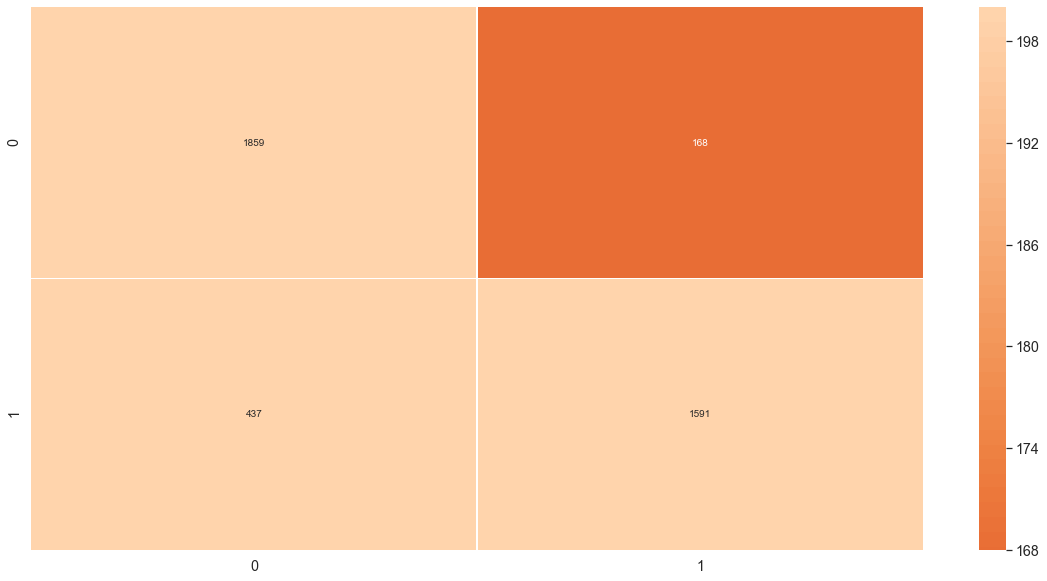

In [49]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

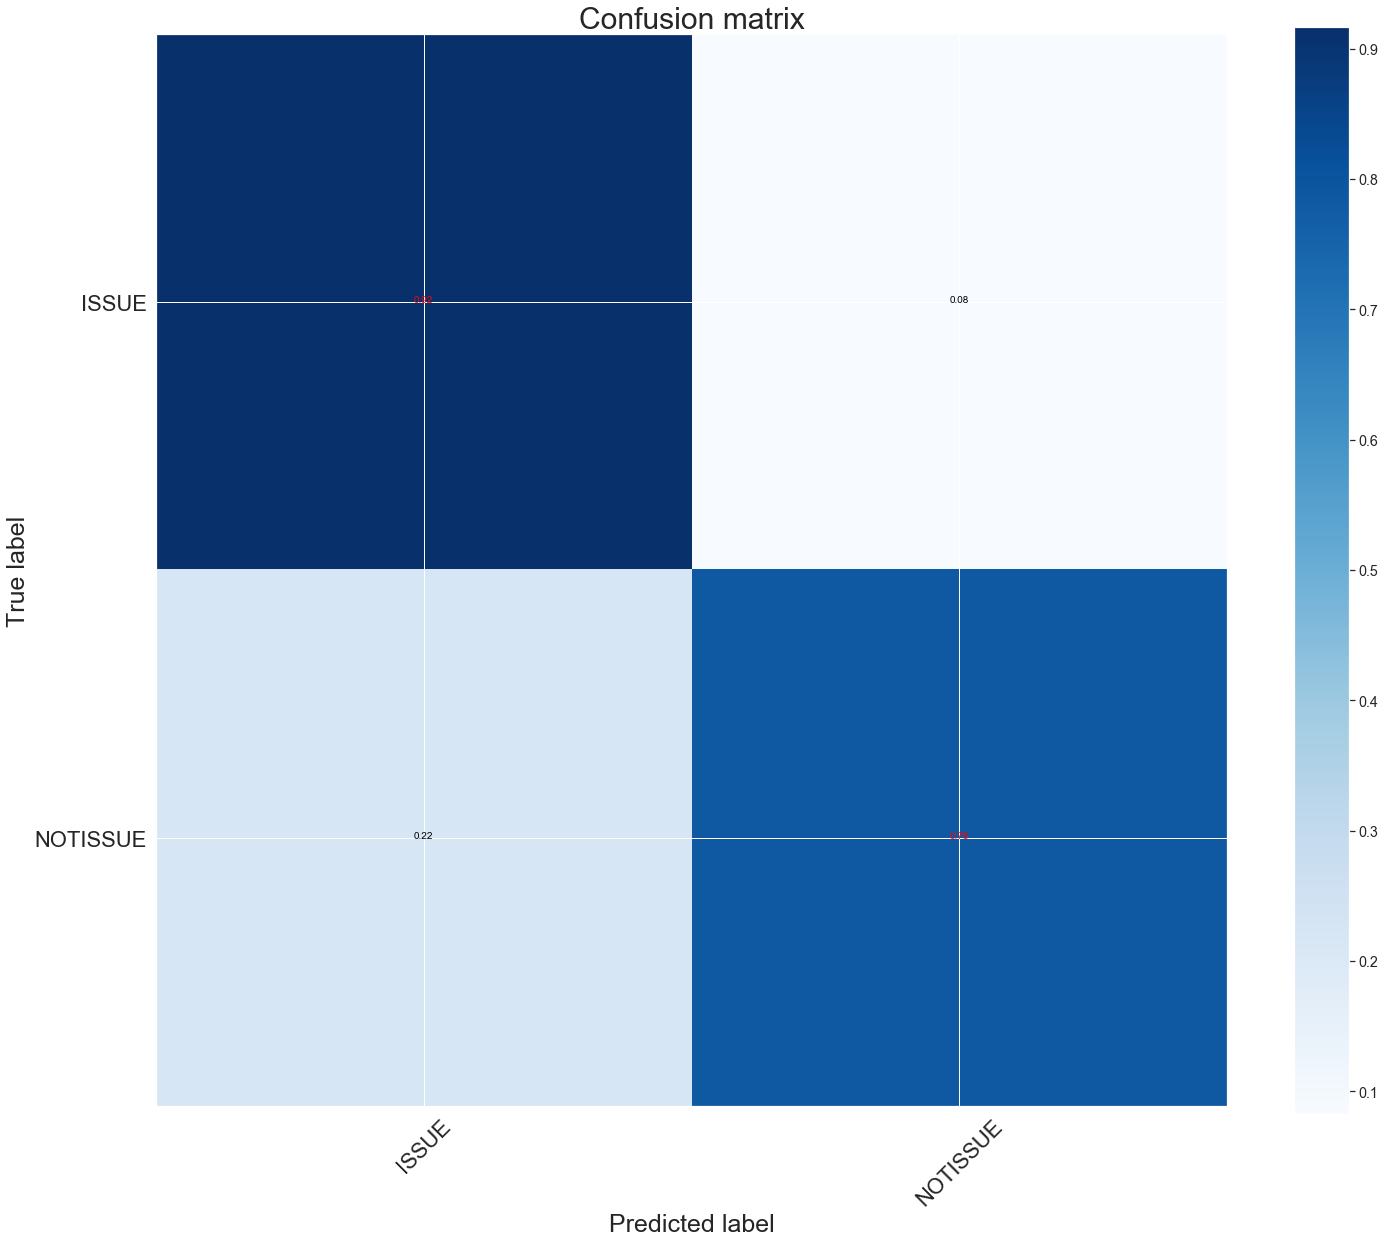

In [51]:
cnf_matrix = confusion_matrix(df.label, data_predict.label)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=['ISSUE','NOTISSUE'], title="Confusion matrix")
plt.show()

In [52]:
from sklearn.metrics import classification_report, accuracy_score

print('accuracy %s' % accuracy_score(data_predict.label, df.label))
print(classification_report(df.label, data_predict.label,target_names=['ISSUE','NOTISSUE']))

accuracy 0.8508014796547472
              precision    recall  f1-score   support

       ISSUE       0.81      0.92      0.86      2027
    NOTISSUE       0.90      0.78      0.84      2028

   micro avg       0.85      0.85      0.85      4055
   macro avg       0.86      0.85      0.85      4055
weighted avg       0.86      0.85      0.85      4055



In [53]:
def false_pos_neg(input_file,output_file,falses_file):
    diff= pd.DataFrame(columns=['true_label','pred_label', 'Text'])
    data = pd.read_csv(input_file,delimiter=',')
    data_pred = pd.read_csv(output_file,delimiter=';')
    t_labels = data.label
    p_labels = data_pred.label
    
    label=data.text.values
    t_label = t_labels.values
    p_label = p_labels.values
    for i in range(len(t_label)):
        if t_label[i]!=p_label[i]:
            diff = diff.append({'true_label':t_label[i],'pred_label':p_label[i], 'Text':label[i]},ignore_index=True)
    diff.to_csv(falses_file,sep=';')
    return diff

In [54]:
falses_file='../Data/false_pred_glove300_with_text_preprocessing_v9.csv'
diff=false_pos_neg(input_file,output_file,falses_file)
print(diff)

    true_label pred_label                                               Text
0     NOTISSUE      ISSUE  have order data cable get well finish work pro...
1     NOTISSUE      ISSUE                                     not be happier
2        ISSUE   NOTISSUE                               solo technology suck
3     NOTISSUE      ISSUE   take self portrait outside exterior display cool
4     NOTISSUE      ISSUE                                       exactly want
5        ISSUE   NOTISSUE  picture resolution far comparably price phone ...
6     NOTISSUE      ISSUE                                     prompt service
7        ISSUE   NOTISSUE  stupid have keep buy new charger car charger c...
8     NOTISSUE      ISSUE               phone have have have be cheaply make
9     NOTISSUE      ISSUE                             do not make mistake do
10    NOTISSUE      ISSUE  sanyo have survive dozen drop blackton ill effect
11    NOTISSUE      ISSUE               find cell phone right away enter car